# Credit Card Fraud Detection Predictive Model

#### Introduction:
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [42]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
import xgboost as xgb
from sklearn import svm
import warnings 
warnings.filterwarnings("ignore")

In [43]:
df1=pd.read_csv("creditcard.csv")

In [44]:
df = df1.iloc[:100000]

In [6]:
df.shape

(100000, 31)

In [7]:
df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [8]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,100000.000000,100000.000000,100000.000000,100000.000000,99999.000000,99999.000000,100000.000000,99999.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,42433.231550,-0.262177,-0.032307,0.676217,0.162593,-0.278503,0.094065,-0.108705,0.056019,-0.046472,...,-0.030865,-0.109090,-0.037024,0.008969,0.132206,0.026658,0.000624,0.001736,97.961222,0.00223
std,17044.922359,1.859226,1.656981,1.322926,1.349263,1.356374,1.301349,1.210924,1.207526,1.121396,...,0.718890,0.634306,0.632908,0.595267,0.441080,0.494539,0.393742,0.325162,264.623031,0.04717
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.00000
25%,33471.750000,-1.028141,-0.598697,0.176770,-0.711442,-0.898645,-0.647830,-0.600180,-0.137456,-0.698812,...,-0.224512,-0.531327,-0.176415,-0.323714,-0.131788,-0.325102,-0.062533,-0.005355,7.570000,0.00000
50%,44299.000000,-0.260557,0.078316,0.753976,0.192567,-0.314370,-0.157014,-0.069084,0.074136,-0.119083,...,-0.057669,-0.083865,-0.049238,0.064997,0.170110,-0.070333,0.009833,0.023318,26.310000,0.00000
75%,55851.250000,1.153324,0.735790,1.376320,1.032416,0.249733,0.486353,0.414667,0.360529,0.558314,...,0.119186,0.308337,0.081526,0.406280,0.419929,0.300675,0.083027,0.076569,89.000000,0.00000
max,67375.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,19.002942,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000,1.00000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    100000 non-null  float64
 1   V1      100000 non-null  float64
 2   V2      100000 non-null  float64
 3   V3      100000 non-null  float64
 4   V4      99999 non-null   float64
 5   V5      99999 non-null   float64
 6   V6      100000 non-null  float64
 7   V7      99999 non-null   float64
 8   V8      100000 non-null  float64
 9   V9      100000 non-null  float64
 10  V10     100000 non-null  float64
 11  V11     100000 non-null  float64
 12  V12     100000 non-null  float64
 13  V13     100000 non-null  float64
 14  V14     100000 non-null  float64
 15  V15     100000 non-null  float64
 16  V16     100000 non-null  float64
 17  V17     100000 non-null  float64
 18  V18     100000 non-null  float64
 19  V19     100000 non-null  float64
 20  V20     100000 non-null  float64
 21  V21     100

In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        1
V5        1
V6        0
V7        1
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [53]:
median1=df["V4"].median()
df["V4"]=df["V4"].replace(np.NaN,median1)

In [54]:
median2=df["V5"].median()
df["V5"]=df["V5"].replace(np.NaN,median2)

In [55]:
median3=df["V7"].median()
df["V7"]=df["V7"].replace(np.NaN,median3)

In [15]:
df.duplicated().sum()

381

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(99619, 31)

In [14]:
#XScaled  = x.apply(zscore)
#XScaled.describe()

### DATA VISUALIZATION

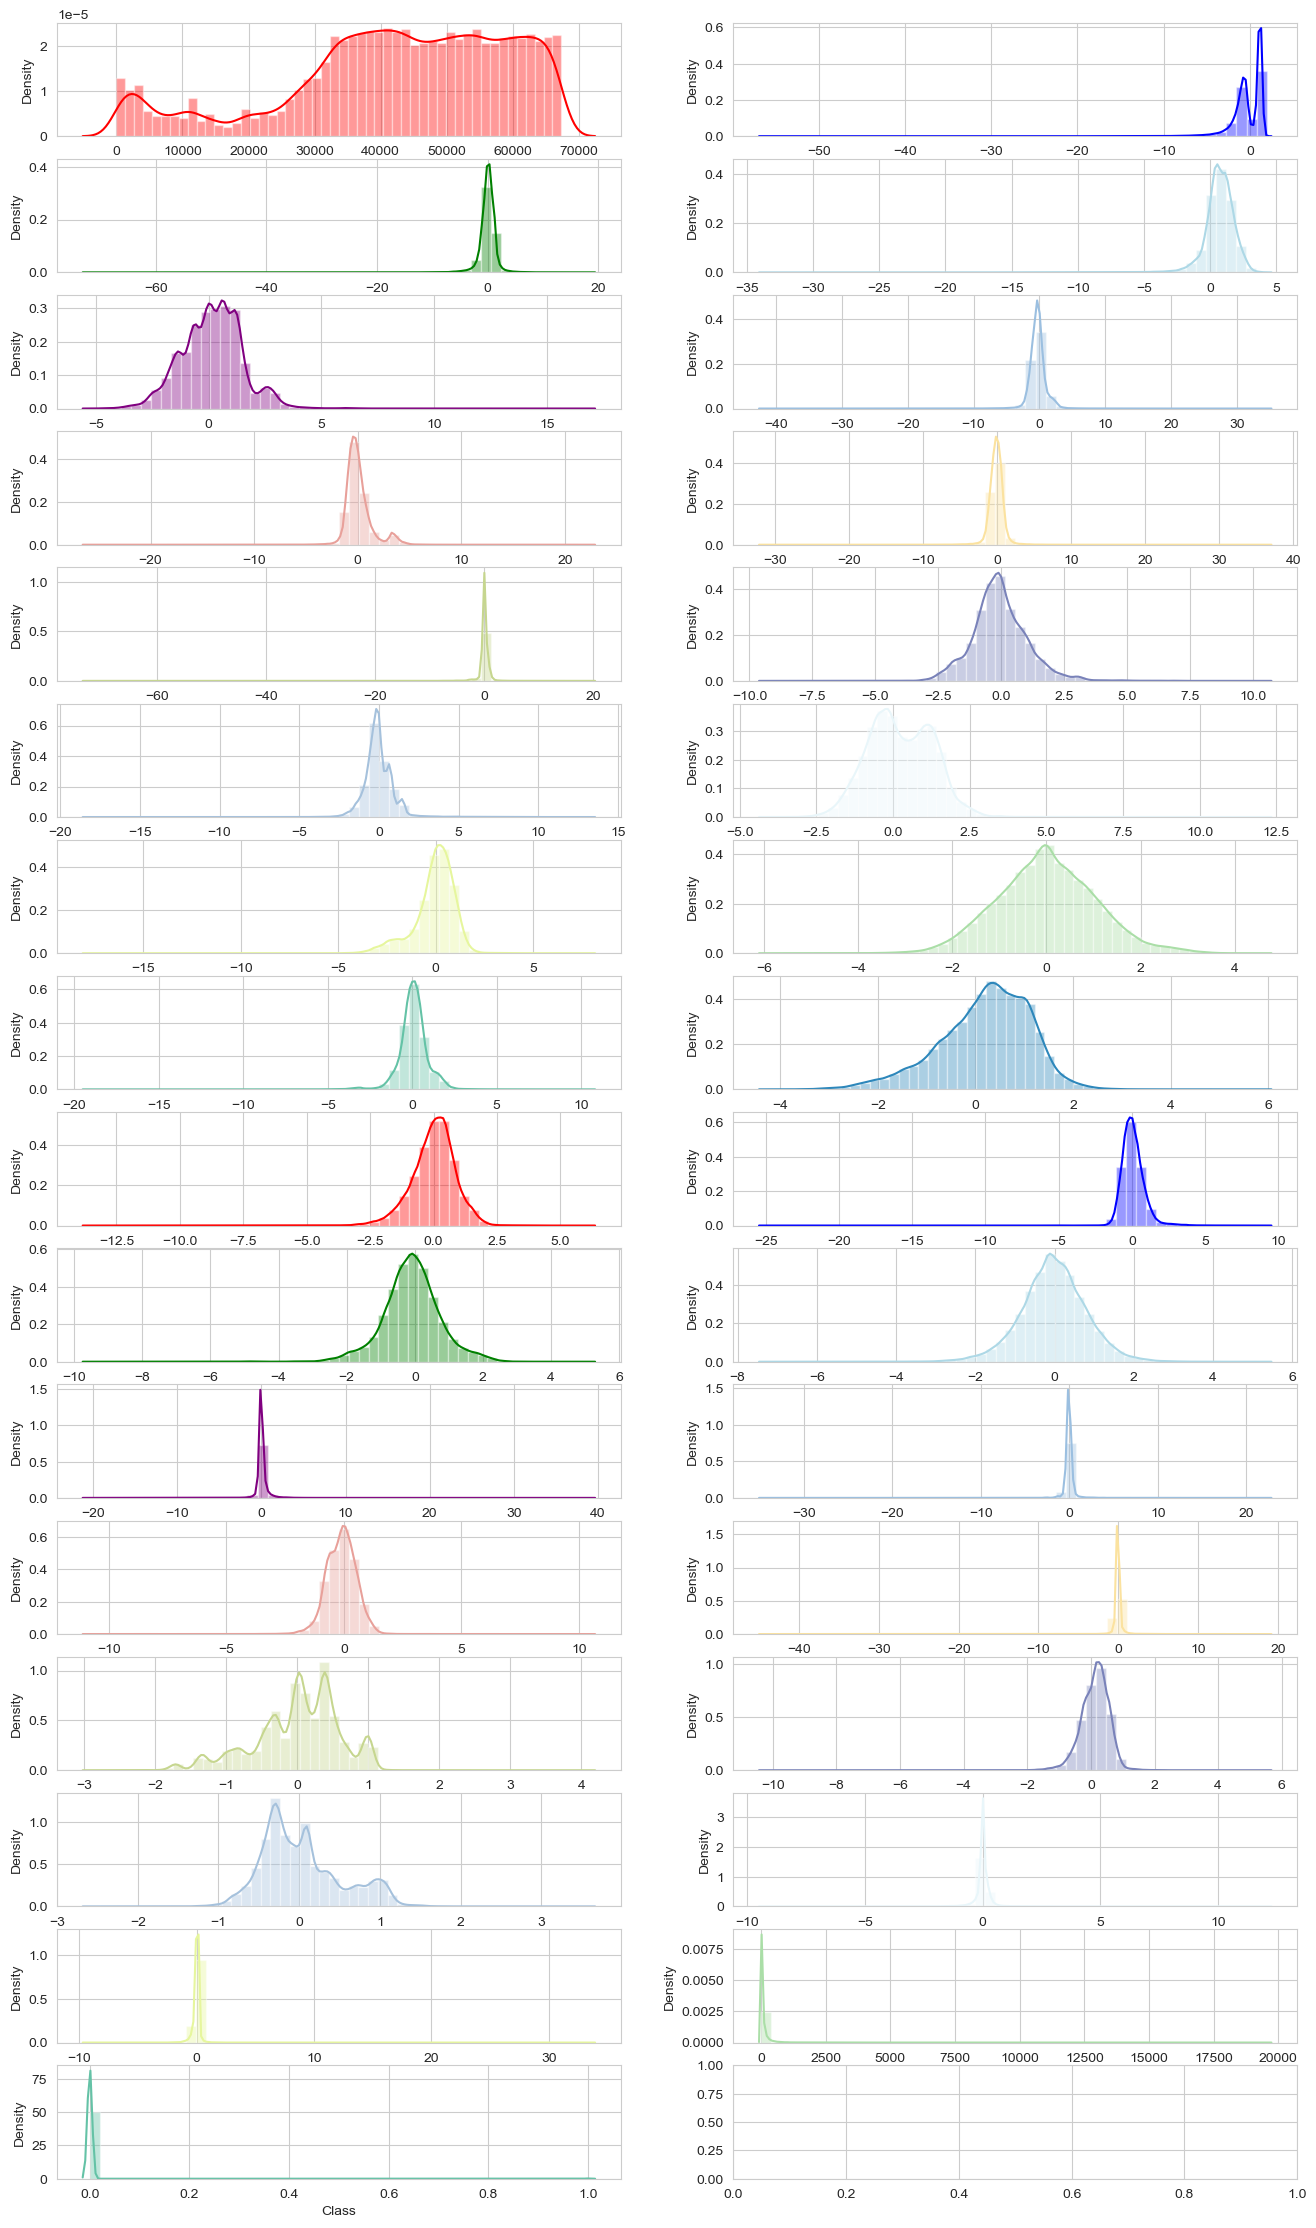

In [43]:
n_rows = 16
n_cols = 2
colors = ['red','blue', 'green', 'lightblue', 'purple',"#9BBFE0","#E8A09A","#FBE29F","#C6D68F","#7982B9","#A5C1DC","#E9F6FA","#E6F69D","#AADEA7","#64C2A6","#2D87BB","#FFC154"]
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(16,28))
for i, column in enumerate(df.columns):
    sns.distplot(df[column], ax=axes[i // n_cols, i % n_cols], color=colors[i % n_rows])
plt.show()

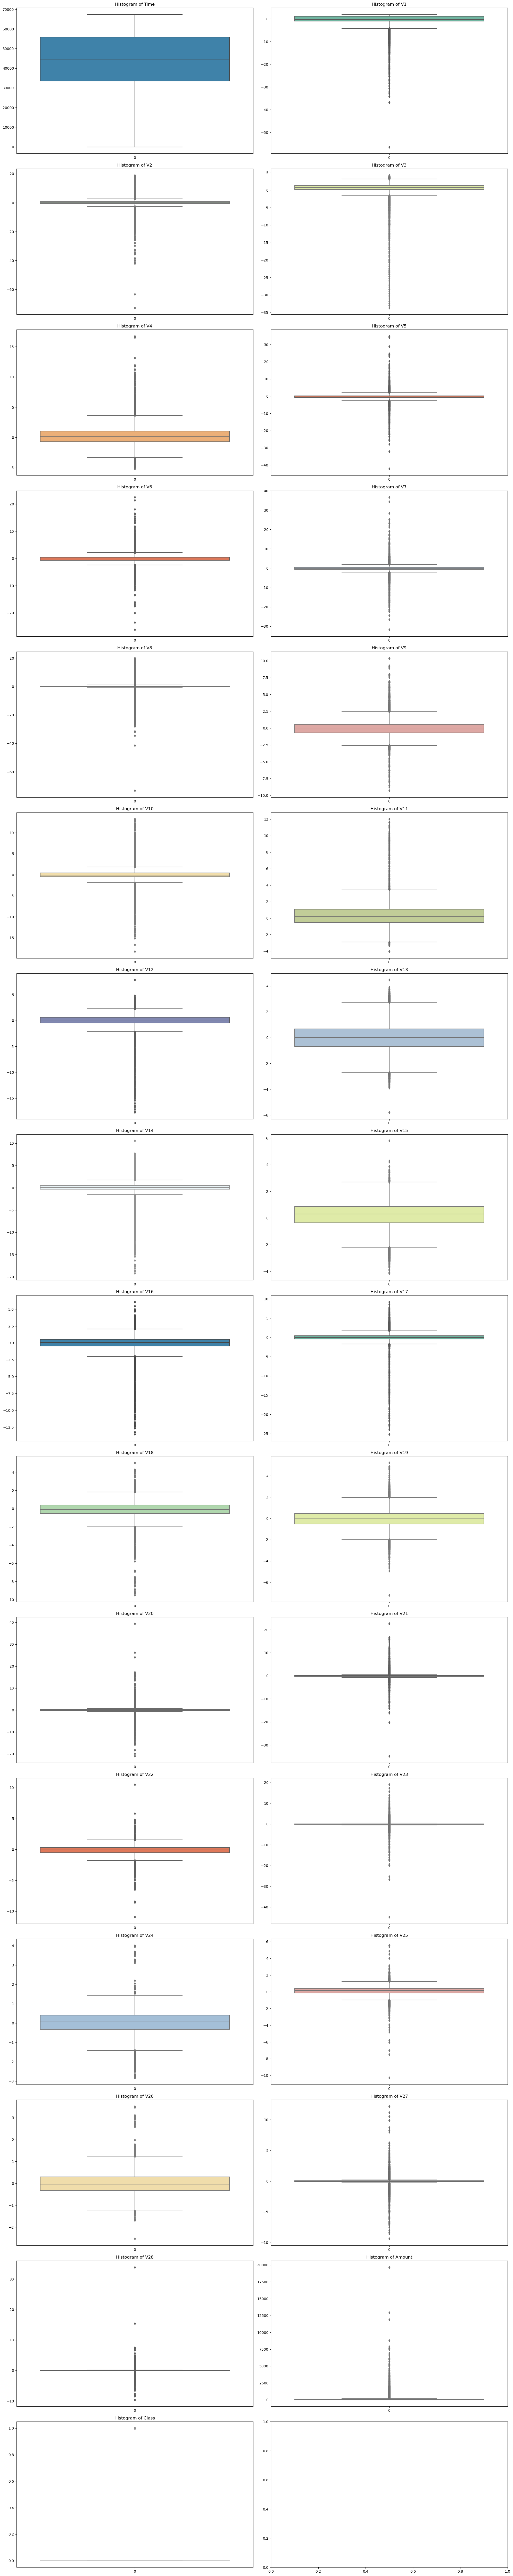

In [16]:
colors = ['#2D87BB', '#64C2A6', '#AADEA7', '#E6F69D', '#FEAE65', '#F66D44', '#F66D44', '#A5C1DC',"#9BBFE0","#E8A09A","#FBE29F","#C6D68F","#7982B9","#A5C1DC","#E9F6FA","#E6F69D"]
num_cols = len(df.columns)
num_rows = (num_cols + 1) // 2  
fig, axes = plt.subplots(num_rows, 2, figsize=(20,100))
if num_rows == 1:
    axes = axes.reshape(1, -1)
for i, column in enumerate(df.columns):
    row = i // 2  
    col = i % 2   
    sns.boxplot(df[column], ax=axes[row][col], color=colors[i % len(colors)])
    axes[row][col].set_title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

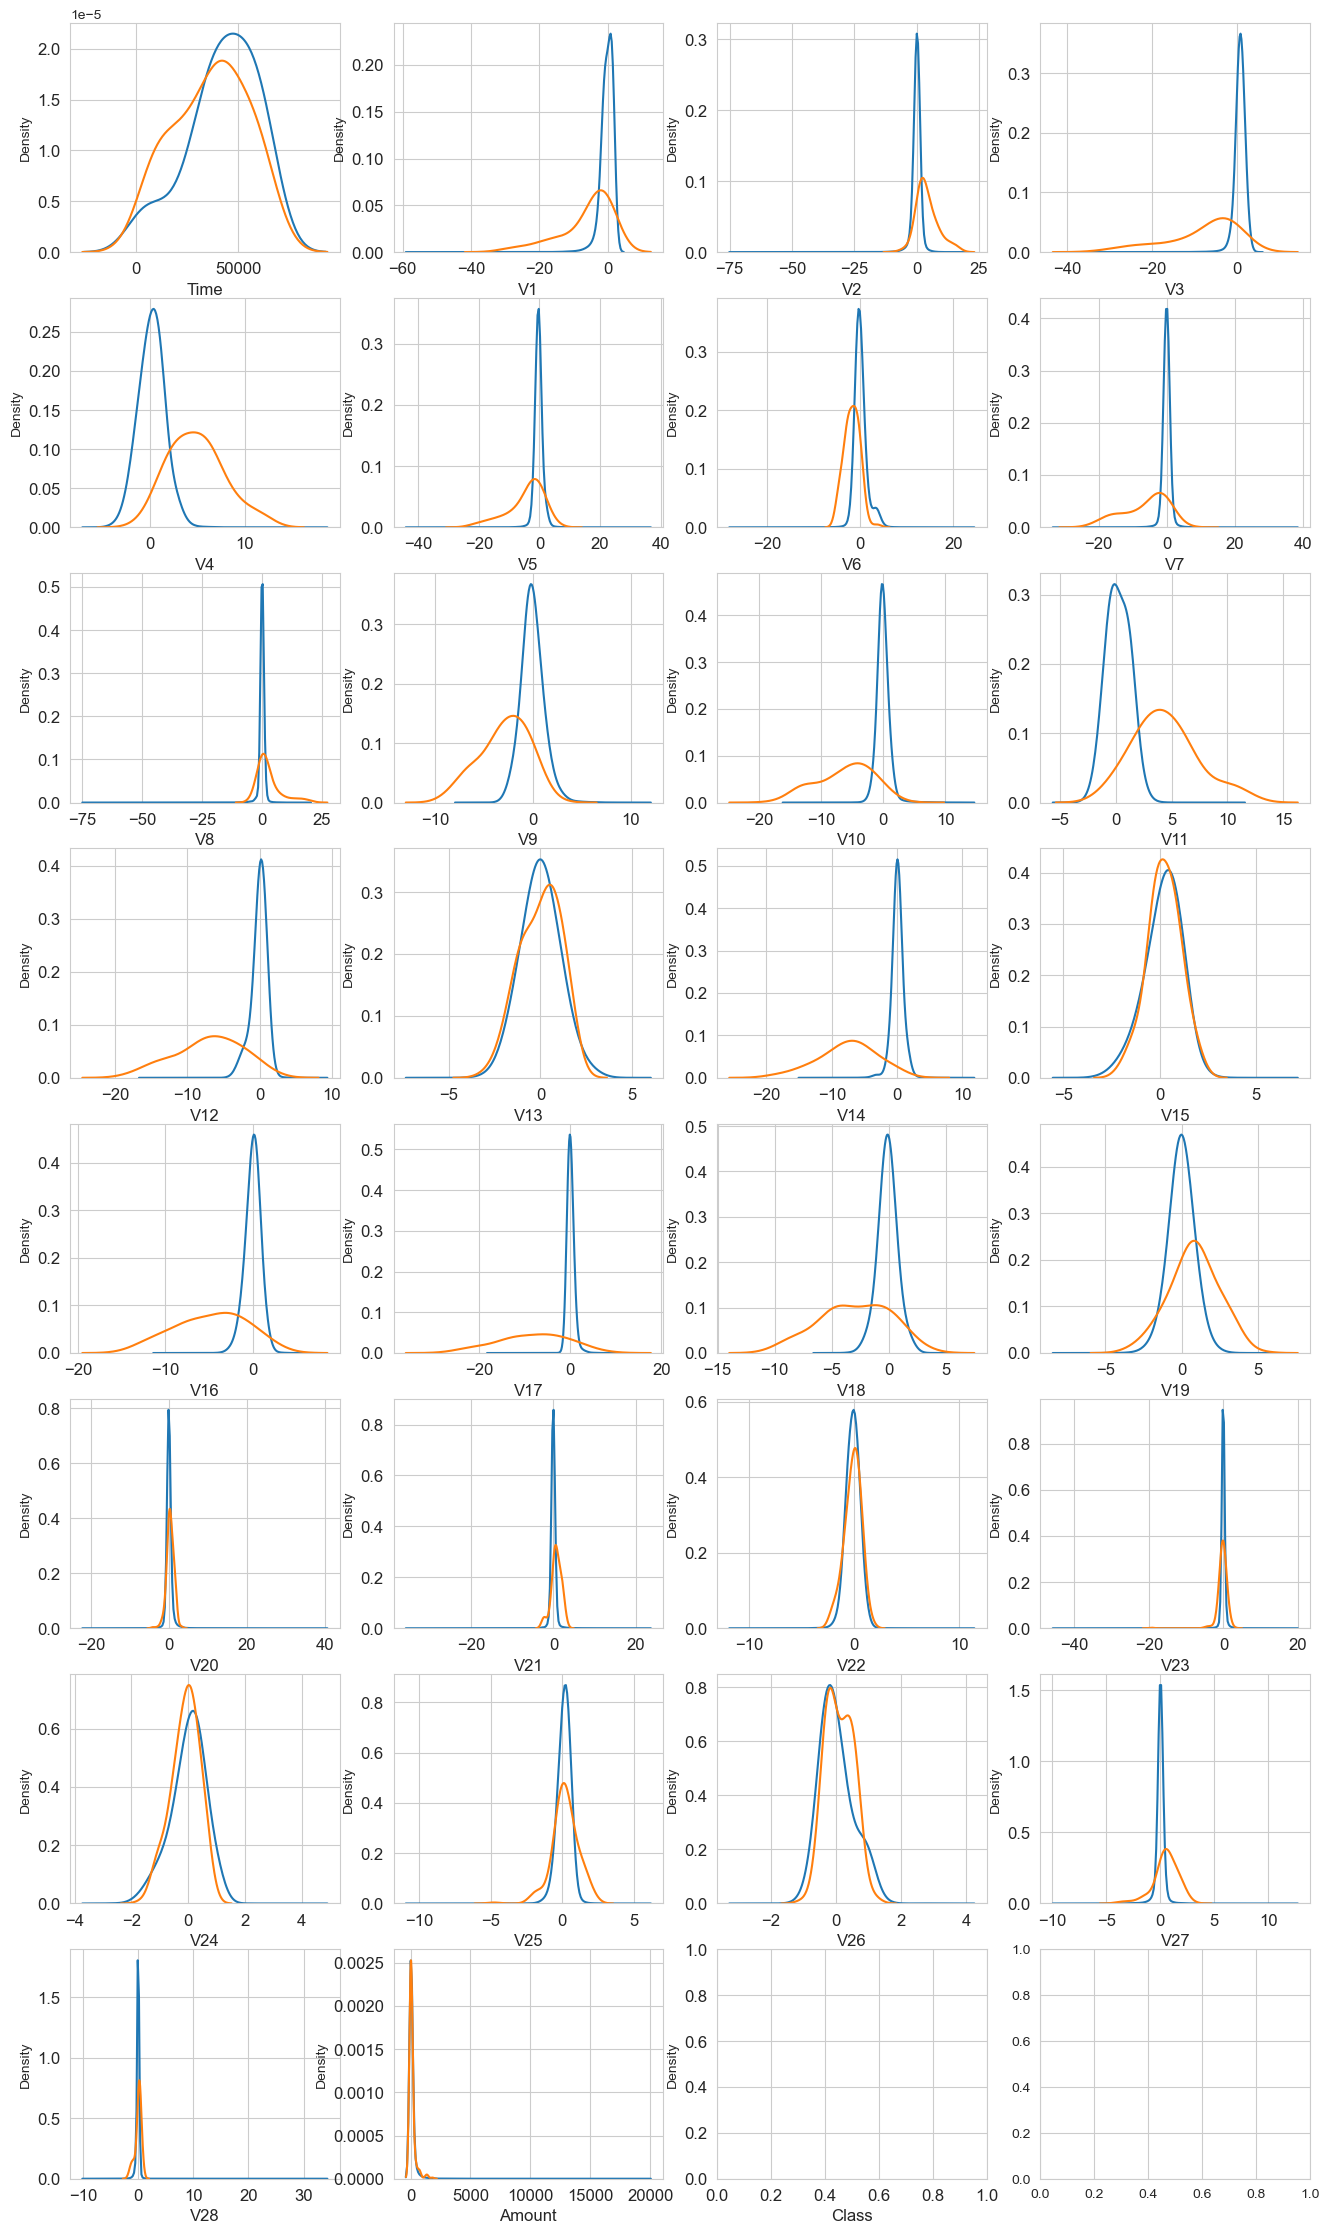

In [17]:
var = df.columns.values
i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))
for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [18]:
plt.rcParams['figure.figsize']=(70,150)
df.plot(kind='hist', bins=10, subplots=True, layout=(20,2), sharex=False, sharey=False)
plt.show()

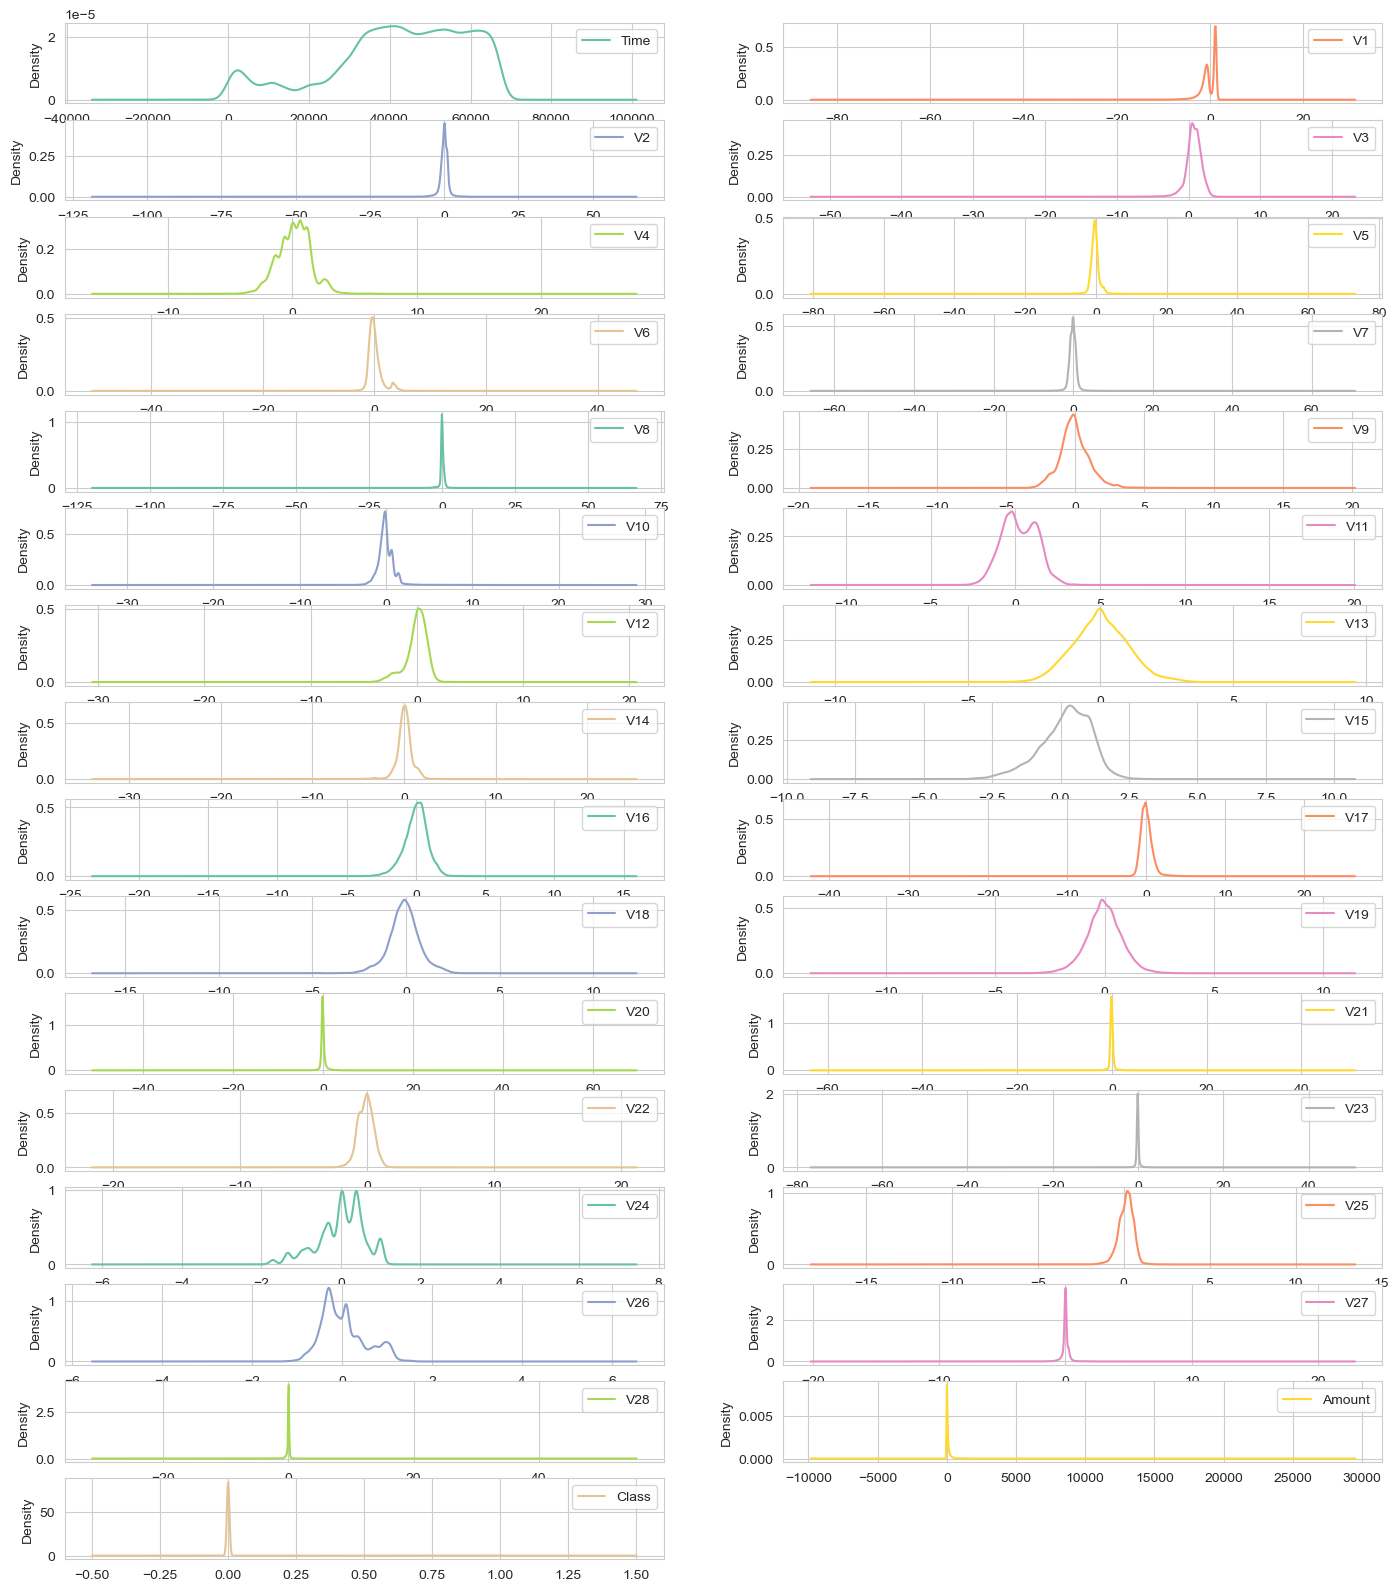

In [19]:
plt.rcParams['figure.figsize']=(30,25)
colors = sns.color_palette("Set2")
df.plot(kind='density',subplots=True, layout=(20,2), sharex=False, sharey=False , figsize =(17,25) , color = colors, grid = True )
plt.show()

### outliers

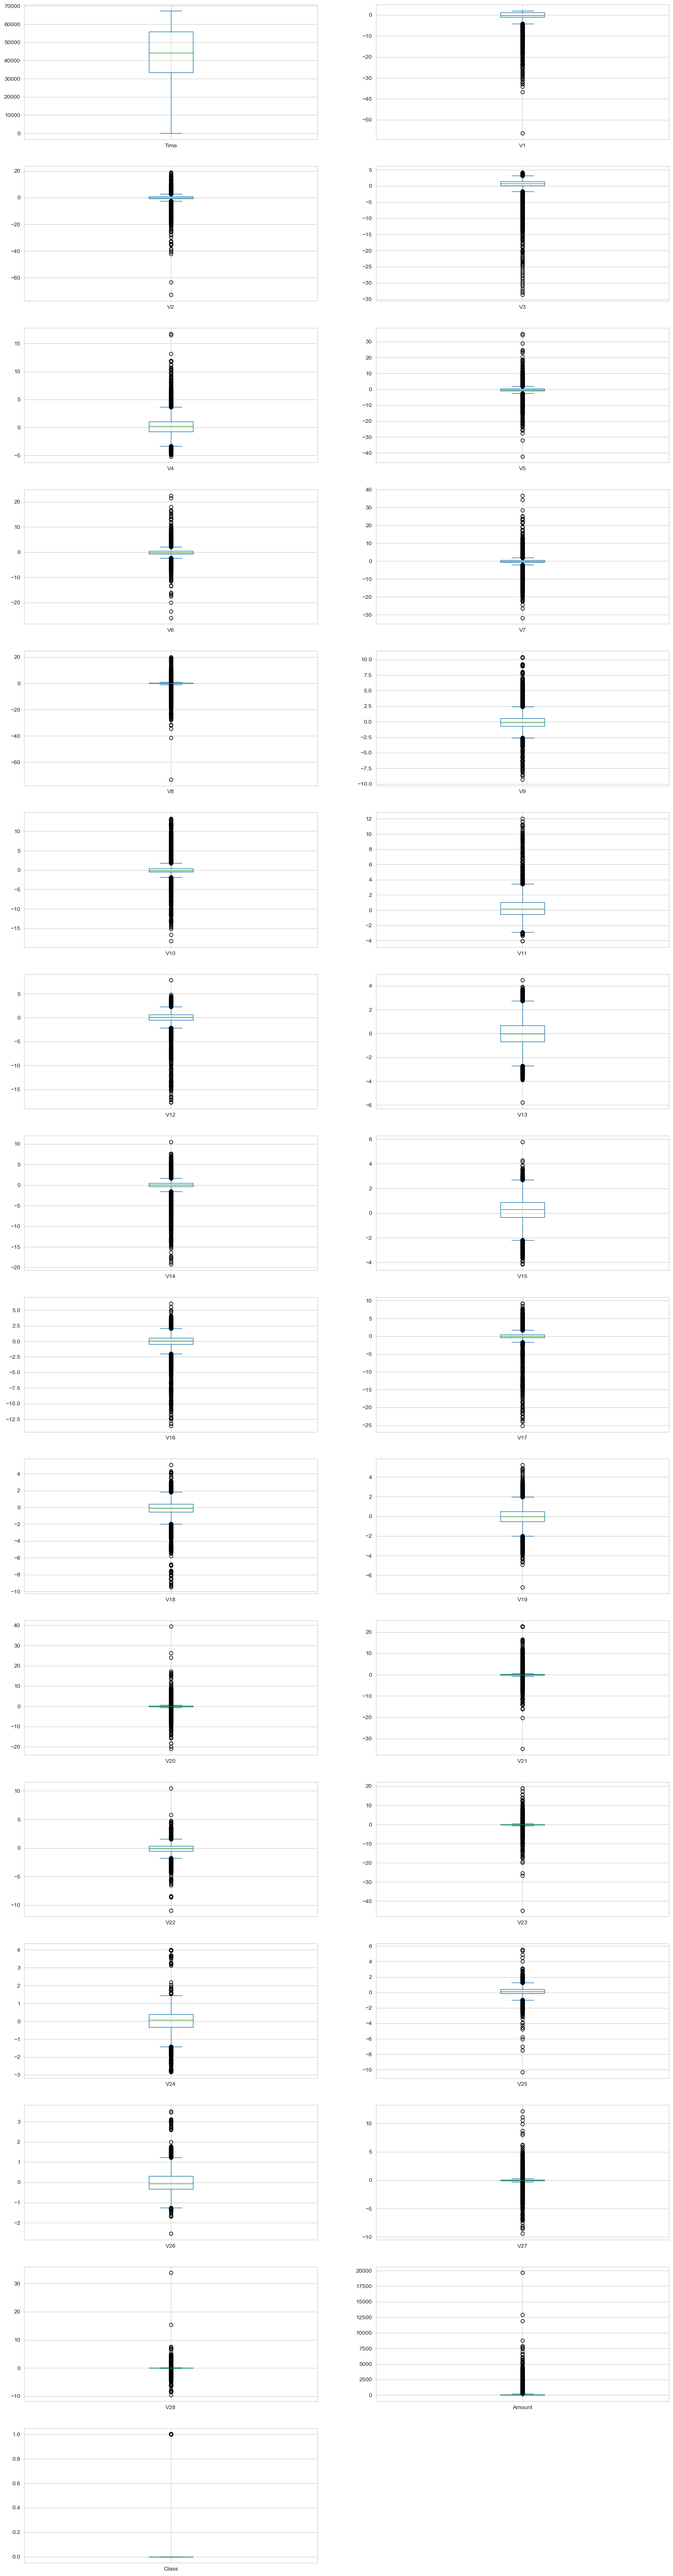

In [20]:
plt.rcParams['figure.figsize']=(20,100)
df.plot(kind='box', subplots=True, layout=(20,2), sharex=False, sharey=False)
plt.show()

### Univariate

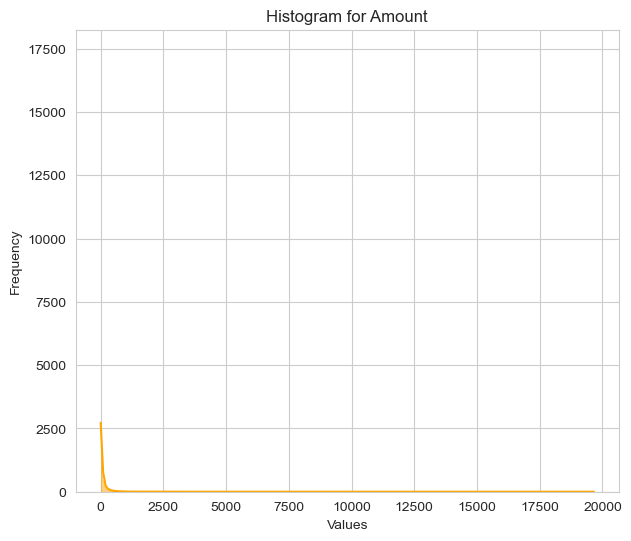

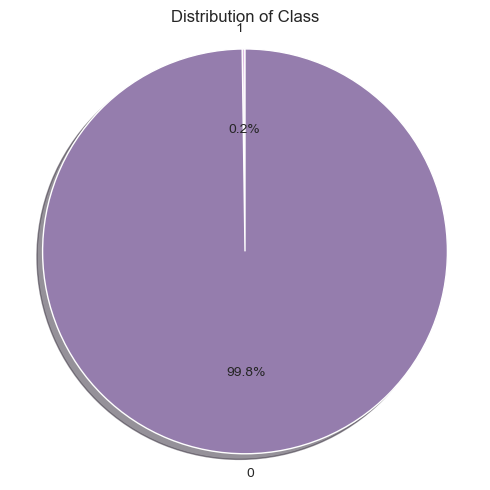

In [21]:
# Histogram
plt.figure(figsize=(7, 6))
sns.histplot(df["Amount"], kde=True,color="orange")
plt.title('Histogram for Amount')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# pie chart
labels = df['Class'].unique()
sizes = (df['Class'].value_counts()/df['Class'].value_counts().sum())*100
sizes = sizes.sort_index(ascending=False)
labels = sizes.index
plt.figure(figsize=(5,5))
colors = ['#E0BBE4', '#957DAD', '#D291BC', '#FEC8D8', '#FFDFD3']
plt.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
plt.axis('equal')
plt.title("Distribution of Class")
plt.tight_layout()
plt.show()

### Bivariate

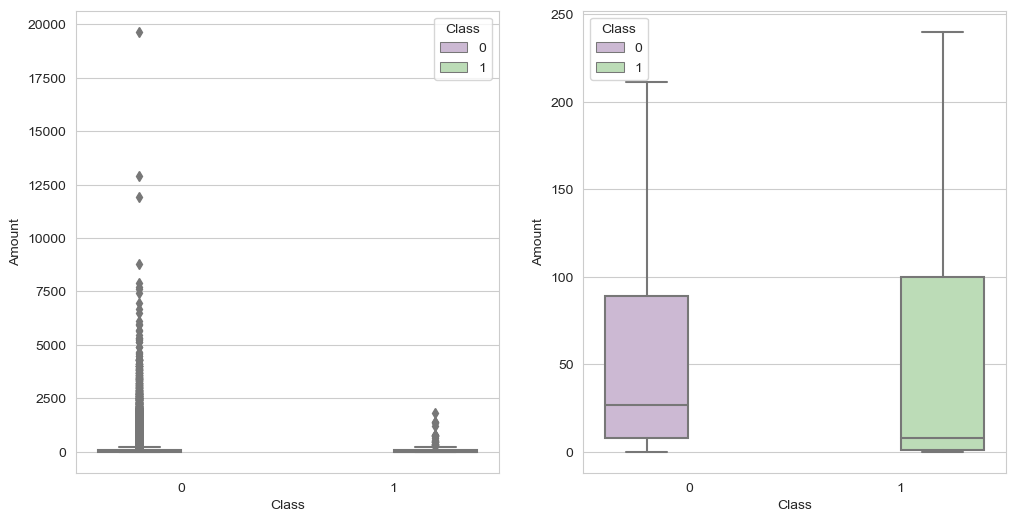

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show()

### Multivariate

In [23]:
#sns.pairplot(data=df)

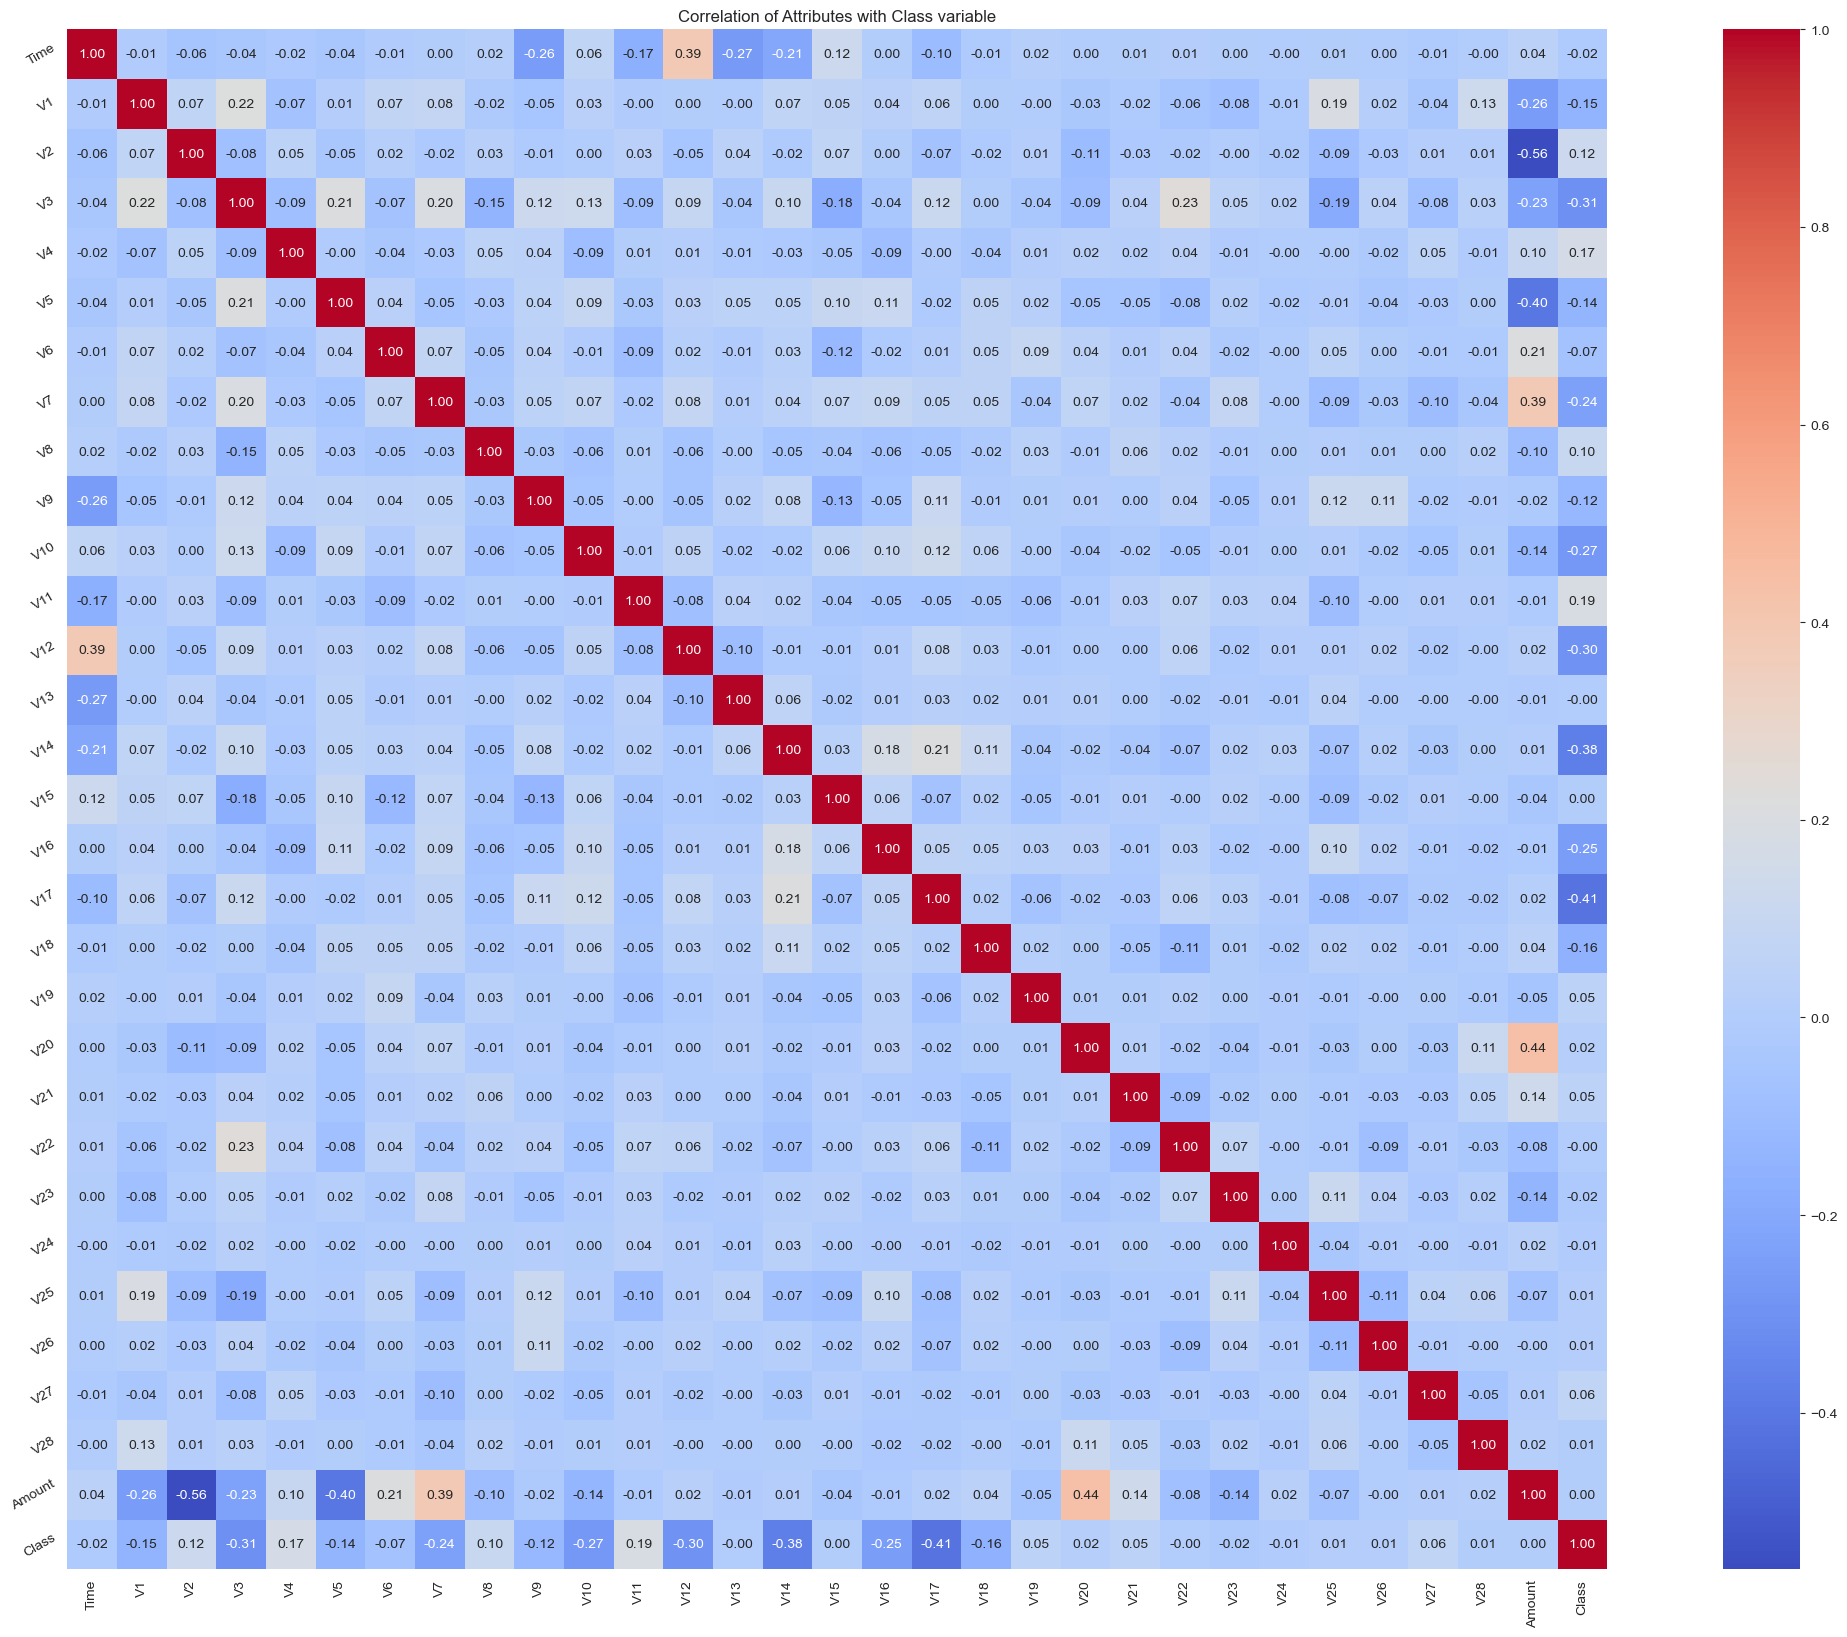

In [24]:
correlation=df.corr()
plt.figure(figsize=(30,20))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white',cmap="coolwarm")
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)  
plt.show()

### Model Building

In [26]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [27]:
train_df, test_df = train_test_split(df, test_size=0.30, random_state=0, shuffle=True )
train_df, valid_df = train_test_split(df, test_size=0.30, random_state=0, shuffle=True )

## <a id="61">RandomForestClassifier</a>

In [28]:
model= RandomForestClassifier(n_jobs=4,criterion="gini")

In [29]:
model.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4)

In [30]:
preds = model.predict(valid_df[predictors])

In [31]:
roc_auc_score(valid_df[target].values, preds)

0.922468130938912

Let's also visualize the features importance.

### Features importance

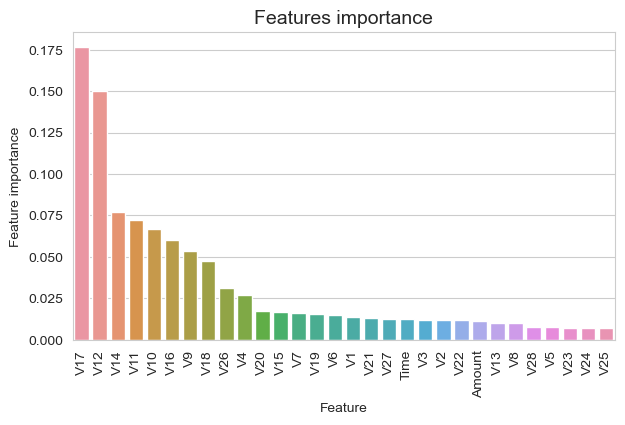

In [32]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

The most important features are **V17**, **V12**, **V14**, **V10**, **V11**, **V16**.


### Confusion matrix

Let's show a confusion matrix for the results we obtained. 

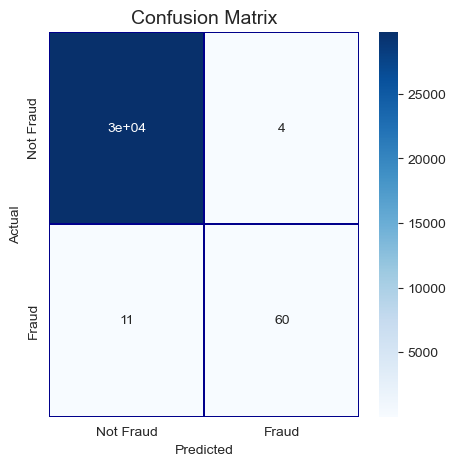

In [33]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

### Area under curve

In [34]:
roc_auc_score(valid_df[target].values, preds)

0.922468130938912

## <a id="62">AdaBoostClassifier</a>


In [35]:
model = AdaBoostClassifier()
model.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier()

In [36]:
preds = model.predict(valid_df[predictors])

In [37]:
roc_auc_score(valid_df[target].values, preds)

0.8519785153989509

### Features importance

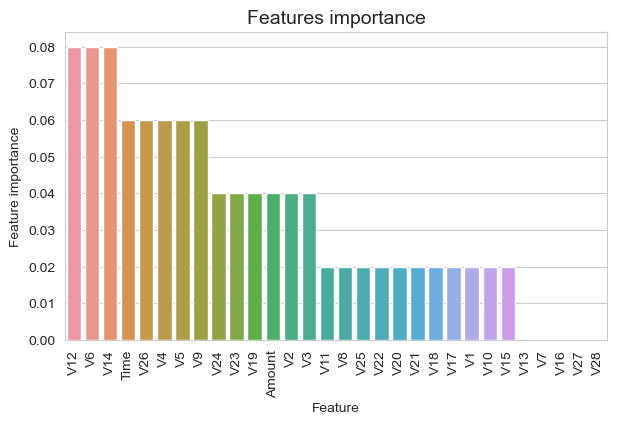

In [38]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

### Confusion matrix

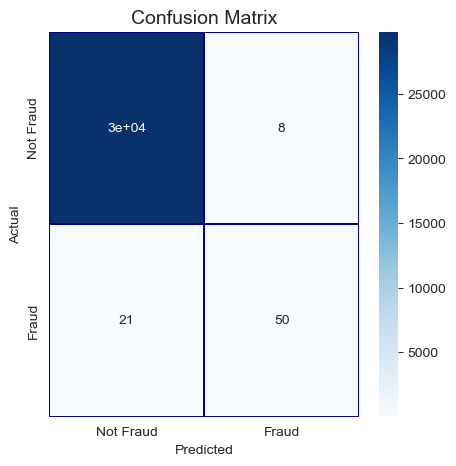

In [39]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

### Area under curve

In [40]:
roc_auc_score(valid_df[target].values, preds)

0.8519785153989509

## <a id="63">XGBoost</a>

### Prepare the model

We initialize the DMatrix objects for training and validation, starting from the datasets. We also set some of the parameters used for the model tuning.

In [41]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'

In [46]:
model = xgb.train(params,dtrain)

[17:17:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



### Plot variable importance

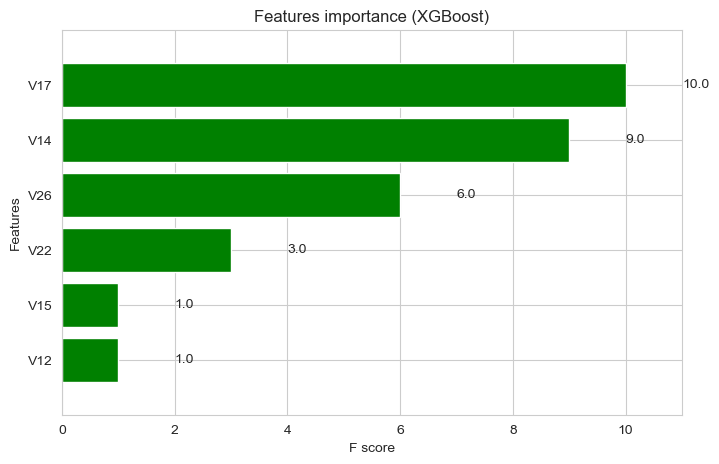

In [47]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

### Predict test set


We used the train and validation sets for training and validation. We will use the trained model now to predict the target value for the test set.

In [48]:
preds = model.predict(dtest)

### Area under curve

Let's calculate ROC-AUC.

In [49]:
roc_auc_score(test_df[target].values, preds)

0.9153802911380744

## <a id="63">LogisticRegression</a>

In [45]:
x=df.drop(["Class"],axis=1)
y=df["Class"]

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
# Perform one-hot encoding on categorical features
categorical_cols = x.select_dtypes(include=['object']).columns
x_encoded = pd.get_dummies(x, columns=categorical_cols)
# Apply SMOTE to balance the data
smote = SMOTE()
x_balanced, y_balanced = smote.fit_resample(x_encoded, y)
# Check the class distribution after applying SMOTE
print("Class distribution after applying SMOTE:")
print(y_balanced.value_counts())

Class distribution after applying SMOTE:
0    99396
1    99396
Name: Class, dtype: int64


In [32]:
#To keep original data as it is to use the same for later.
new_data = df.copy()
#Getting seperated data with 1 and 0 status.
df_majority = new_data[new_data.Class==1]
df_minority = new_data[new_data.Class==0]


#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class


df_majority_downsampled = resample(df_majority,replace=False)
df_downsampled = pd.concat([df_majority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.Class.value_counts())

Downsampled data:->
 0    99396
1      223
Name: Class, dtype: int64


In [30]:
# Separate the minority and majority classes
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0]

# Upsample the minority class (fraudulent transactions)
fraud_upsampled = resample(fraud_df, replace=True, n_samples=len(non_fraud_df))

# Downsample the majority class (non-fraudulent transactions)
non_fraud_downsampled = resample(non_fraud_df, replace=False, n_samples=len(fraud_df))

# Combine the upsampled fraud and downsampled non-fraud dataframes
upsampled_df = pd.concat([fraud_upsampled, non_fraud_df])
downsampled_df = pd.concat([fraud_df, non_fraud_downsampled])

# Upsampled dataset will have balanced classes
upsampled_df['Class'].value_counts()

# Downsampled dataset will have balanced classes
downsampled_df['Class'].value_counts()

1    223
0    223
Name: Class, dtype: int64

In [64]:
df["Class"].isnull().sum()

0

In [46]:
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size = 0.30,random_state = 0)

In [49]:
model_1=RandomForestClassifier()
model_1.fit(x_train,y_train)

RandomForestClassifier()

In [50]:
model_1.score(x_train,y_train)

1.0

In [65]:
model_1.score(x_test,y_test)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [26]:
model_1 = LogisticRegression()
model_1.fit(x_train,y_train)

LogisticRegression()

In [27]:
model_1.score(x_train,y_train)

0.9984225546011214

In [28]:
model_1.score(x_test,y_test)

0.9983938968078699

class 0: (99396, 31)
class 1: (223, 31)
total class of 1 and0: 0    223
1    223
Name: Class, dtype: int64


<Axes: title={'center': 'count (target)'}>

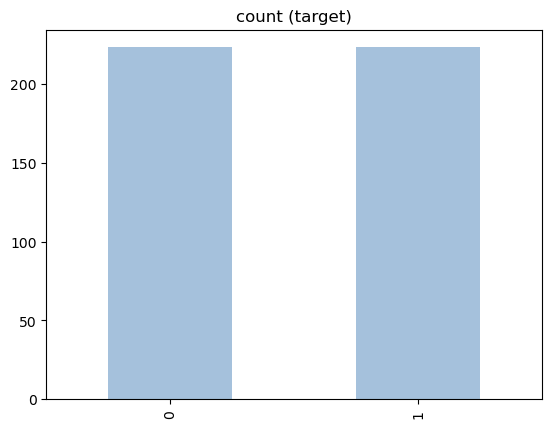

In [40]:
# class count
class_count_0, class_count_1 = df['Class'].value_counts()

# Separate class
class_0 = df[df['Class'] == 0]
class_1 = df[df['Class'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
class_0_under = class_0.sample(class_count_1)

balanced_data = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",balanced_data['Class'].value_counts())# plot the count after under-sampeling
balanced_data['Class'].value_counts().plot(kind='bar', title='count (target)',color="#A5C1DC")

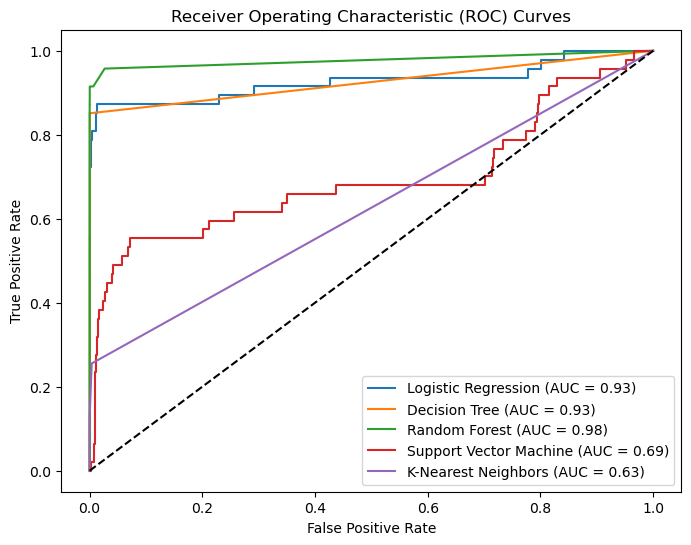

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
# Assume X and y are your feature and target variables, respectively
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)
logreg_preds = logreg_model.predict(x_test)
logreg_accuracy = accuracy_score(y_test, logreg_preds)
logreg_probs = logreg_model.predict_proba(x_test)[:, 1]
logreg_auc = roc_auc_score(y_test, logreg_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_preds = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
dt_probs = dt_model.predict_proba(x_test)[:, 1]
dt_auc = roc_auc_score(y_test, dt_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_preds = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_probs = rf_model.predict_proba(x_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Support Vector Machine
svm_model = SVC(probability=True)
svm_model.fit(x_train, y_train)
svm_preds = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_probs = svm_model.predict_proba(x_test)[:, 1]
svm_auc = roc_auc_score(y_test, svm_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_preds = knn_model.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_preds)
knn_probs = knn_model.predict_proba(x_test)[:, 1]
knn_auc = roc_auc_score(y_test, knn_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = {:.2f})'.format(logreg_auc))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.2f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(svm_fpr, svm_tpr, label='Support Vector Machine (AUC = {:.2f})'.format(svm_auc))
plt.plot(knn_fpr, knn_tpr, label='K-Nearest Neighbors (AUC = {:.2f})'.format(knn_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()